In [1]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid', rc={'ytick.left' : True})
pal = sns.color_palette(palette='icefire')
primary = pal[1]
secondary = pal[5]
highlight = pal[0]

In [15]:
def twin_plot(df, ax):
    sns.barplot(df, x='power', y='energy', label='Energy', legend=False, color=primary, ax=ax)
    ax.errorbar(x=range(len(df)), y=df['energy'], yerr=df['energysd'], fmt='none', c='black', linewidth=2)
    axt = ax.twinx()
    sns.lineplot(x=range(len(df)), y=df['runtime'], label='Runtime', legend=False, color=secondary, linewidth=2.5, ax=axt)

    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = axt.get_legend_handles_labels()
    ax.legend(lines1 + lines2, labels1 + labels2, loc='lower left')

    for bar in ax.patches:
        if bar.get_height() == df['energy'].min():
            bar.set_color(highlight)
            break

    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    axt.set_ylim((0,None))
    axt.grid(False)

In [16]:
def pareto_plot(df, ax):
    sns.scatterplot(df, x='energy', y='runtime', ax=ax)
    ax.set_xlim((0,None))
    ax.set_ylim((0,None))

    sorted_list = sorted([[x, y] for x, y in zip(df['energy'], df['runtime'])])
    
    pareto_front = [sorted_list[0]]
    for pair in sorted_list[1:]:
        if pair[1] <= pareto_front[-1][1]:
            pareto_front.append(pair)

    pf_X = [pair[0] for pair in pareto_front]
    pf_Y = [pair[1] for pair in pareto_front]
    sns.lineplot(x=pf_X, y=pf_Y, ax=ax)

In [21]:
def plot(path):
    df = pd.read_csv(path, sep=' ', names=['size', 'threads', 'bg', 'power', 'runtime', 'runtimesd', 'energy', 'energysd'])
    df['power'] /= 1e6

    for (threads, size, bg), group in df.groupby(['threads', 'size', 'bg']):
        fig, (ax1) = plt.subplots(1, 1, figsize=(6,5))
        twin_plot(group, ax1)
        #pareto_plot(group, ax2)
        fig.suptitle(f'{path.split('/')[1][6:-4]}, {threads} threads, N = {size}, BG = {bg}')
        plt.tight_layout()
        #plt.savefig(f'images_sel265k/{path.split('/')[1][:-4]}_{threads}_{size}.png')
        plt.show()

# N-body

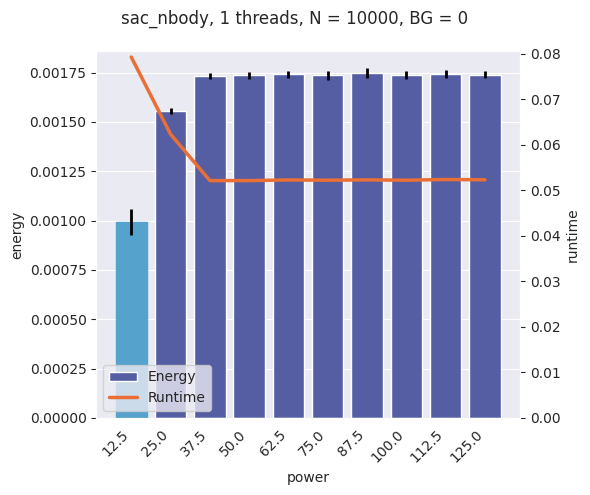

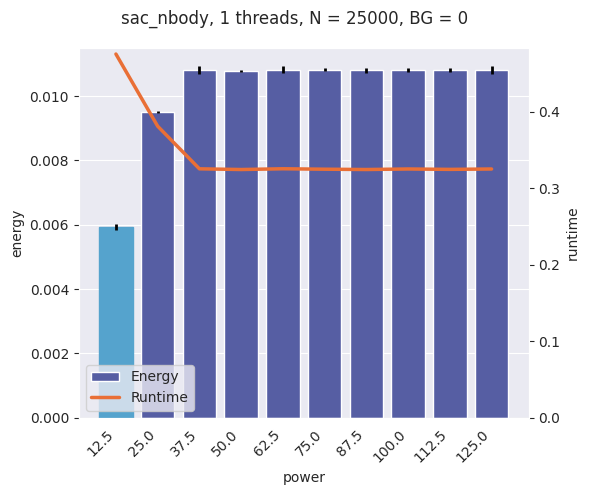

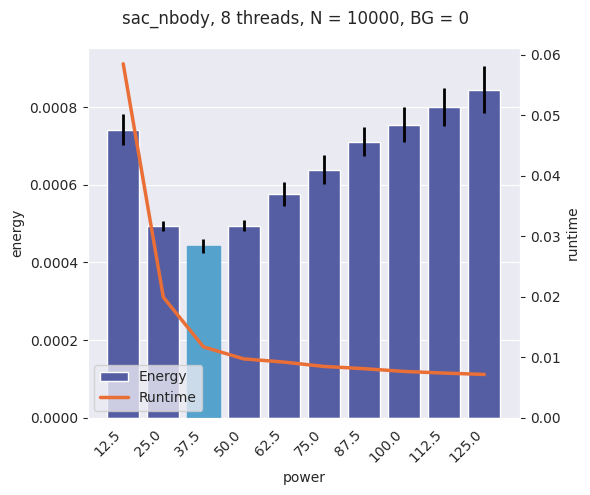

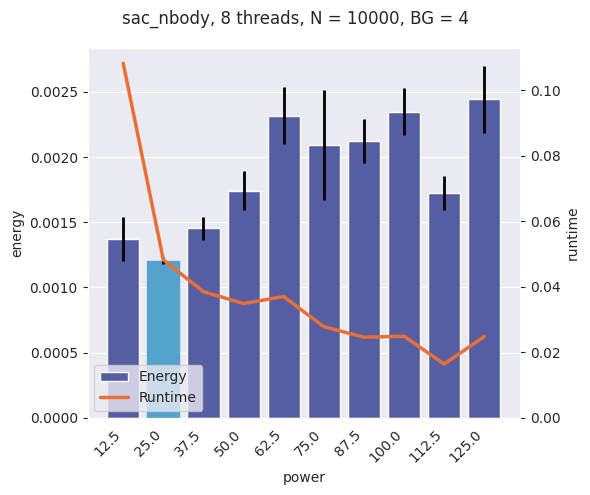

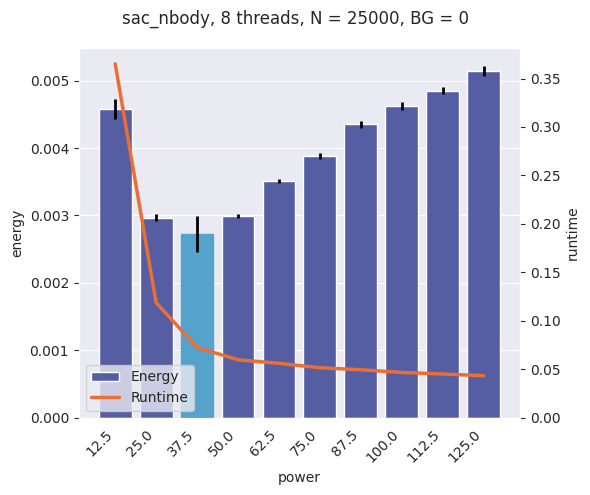

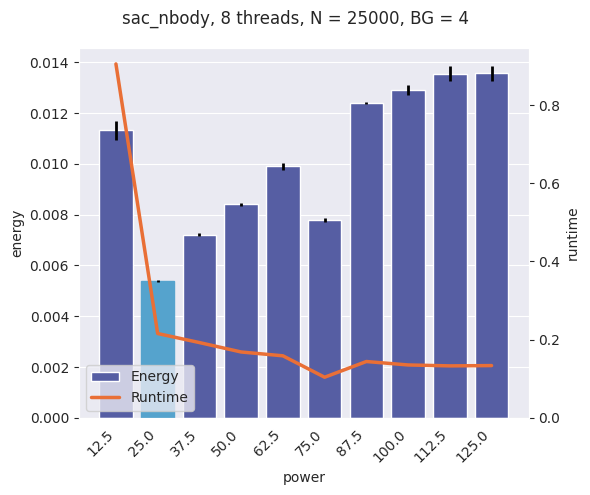

In [22]:
plot('results_sel265k/power_sac_nbody.csv')

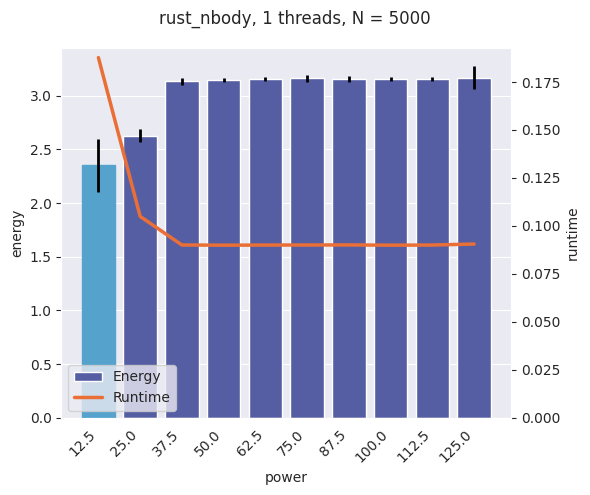

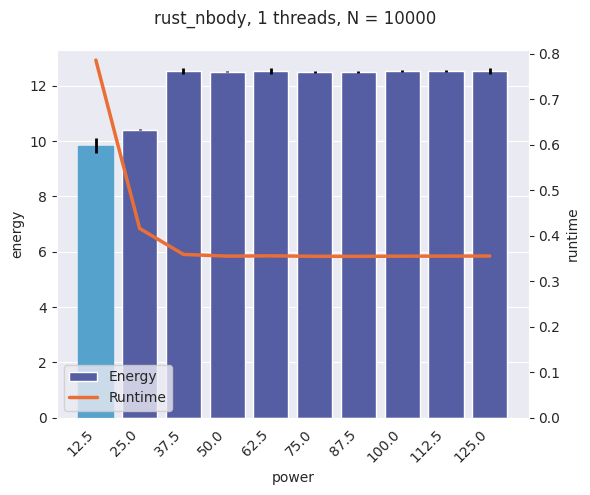

In [7]:
plot('results_sel265k/power_rust_nbody.csv')

# Stencil

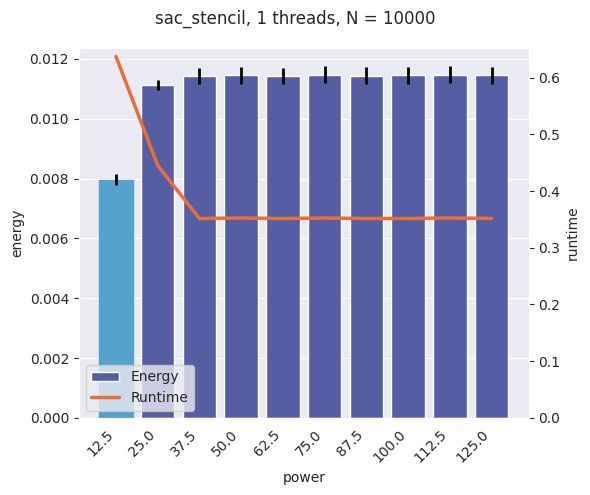

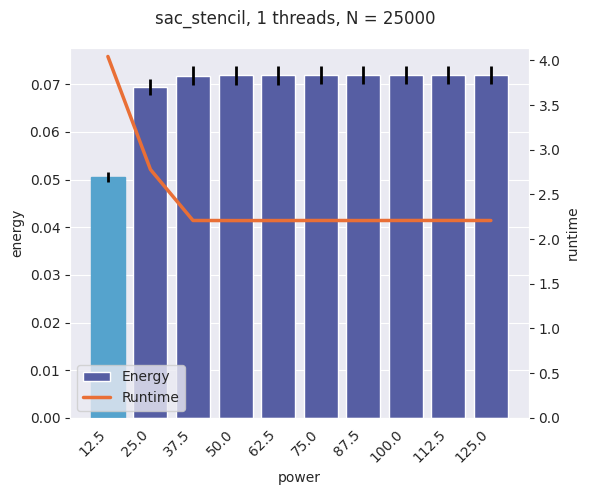

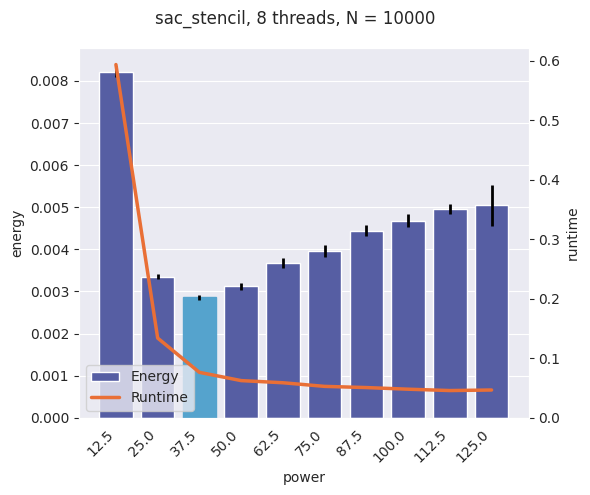

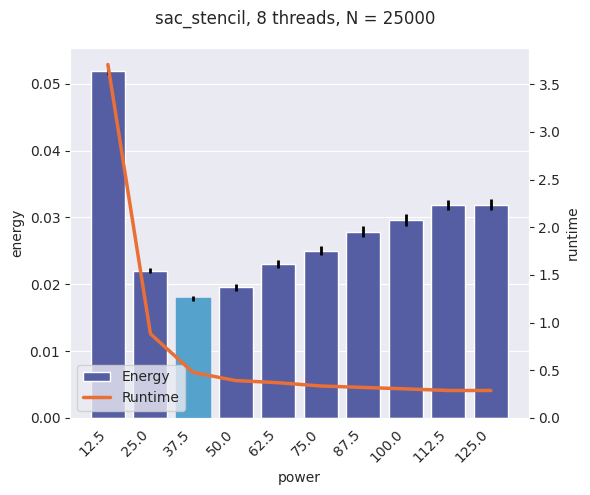

In [8]:
plot('results_sel265k/power_sac_stencil.csv')

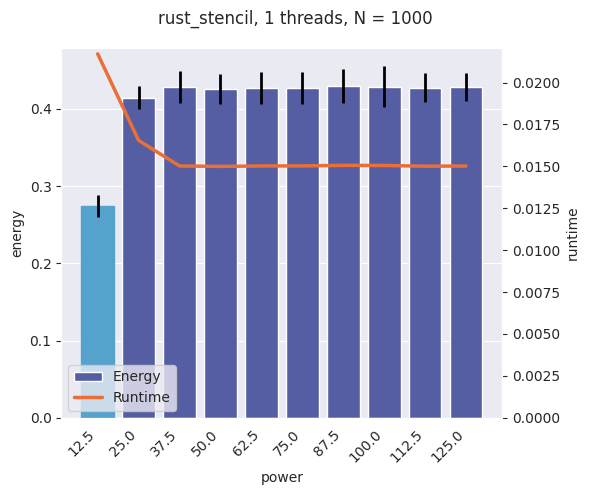

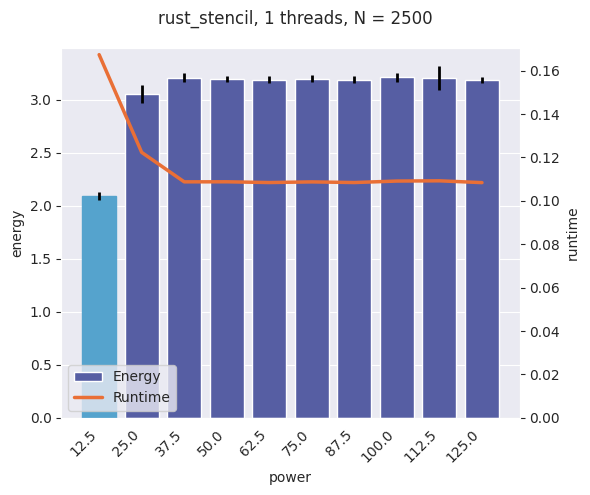

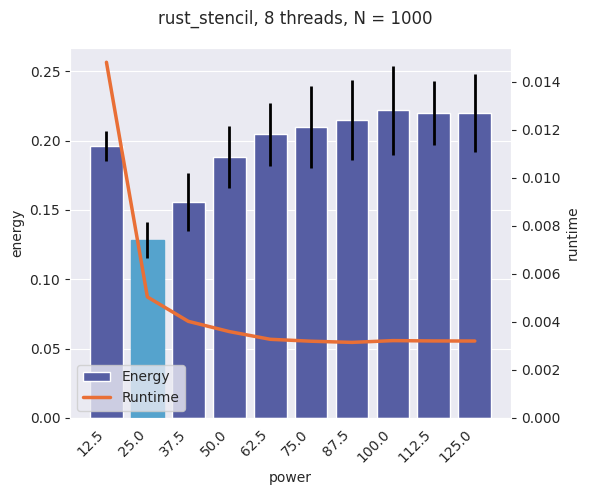

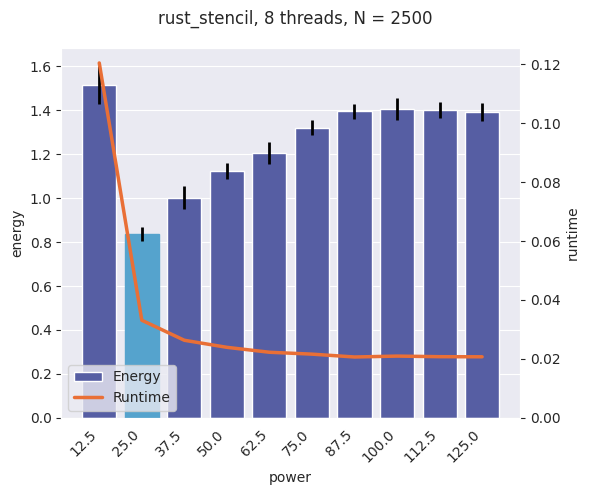

In [9]:
plot('results_sel265k/power_rust_stencil.csv')

# Matmul transpose

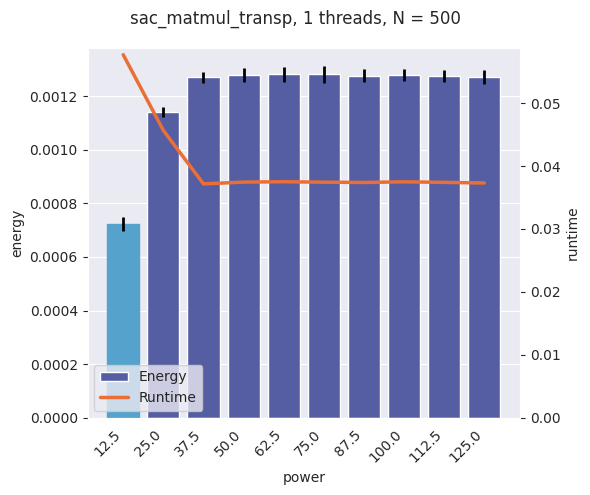

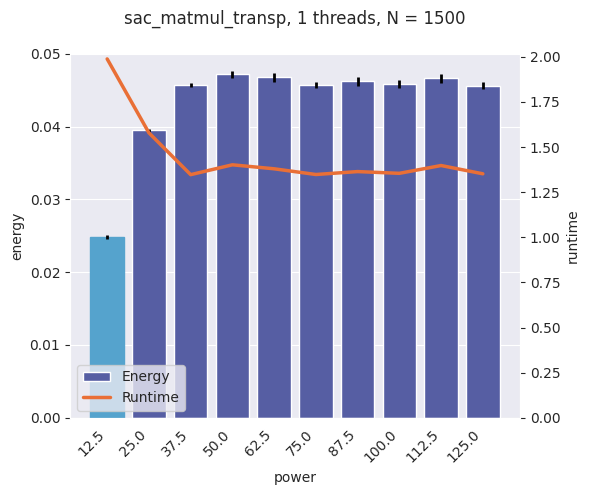

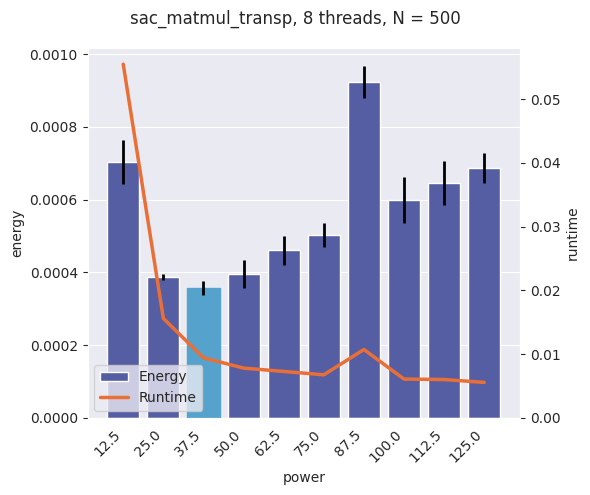

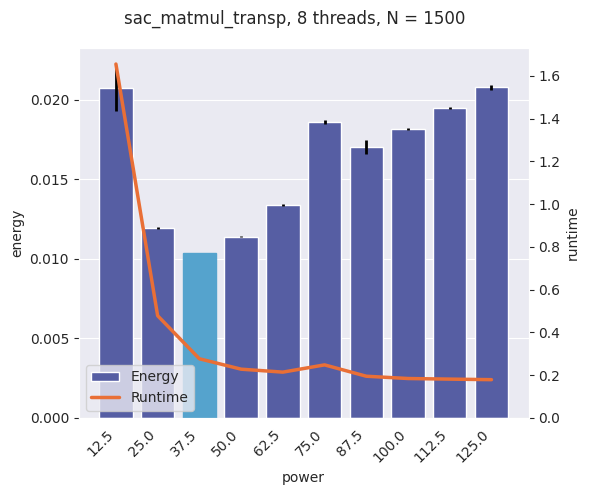

In [10]:
plot('results_sel265k/power_sac_matmul_transp.csv')

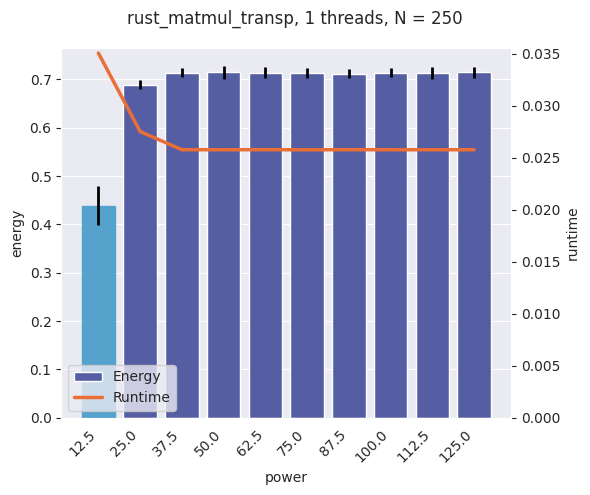

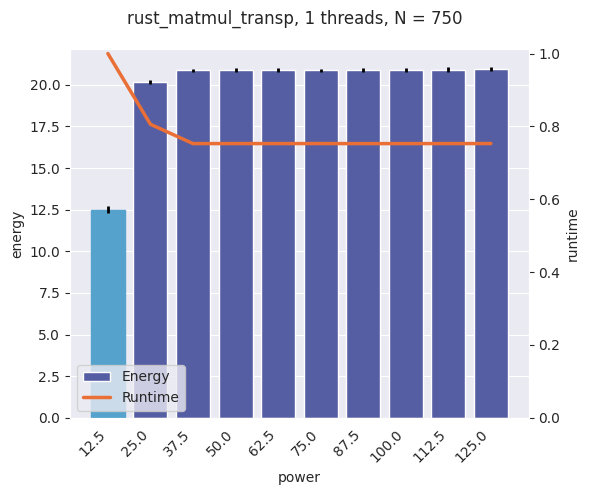

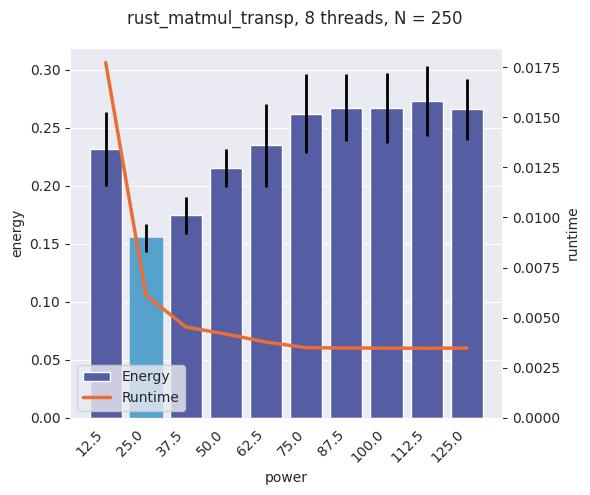

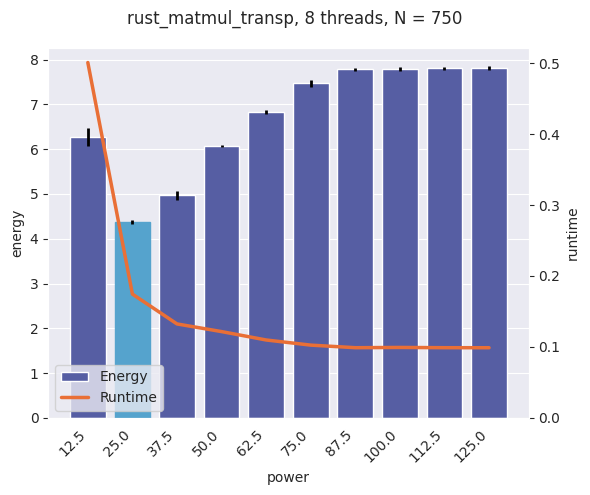

In [11]:
plot('results_sel265k/power_rust_matmul_transp.csv')

# Matmul naive

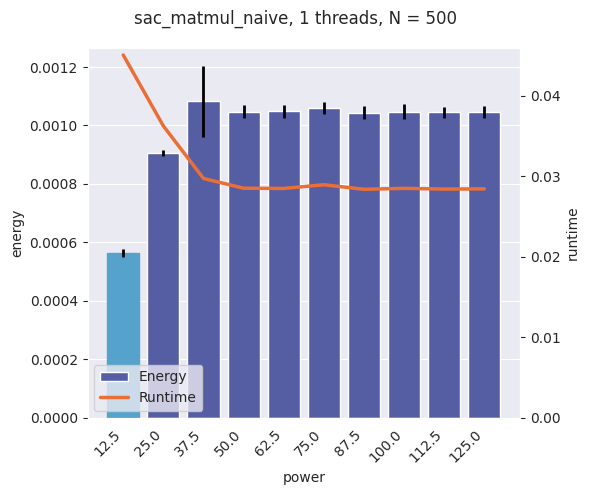

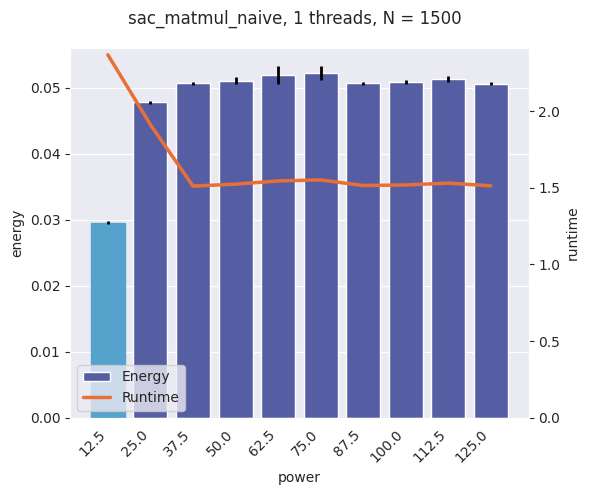

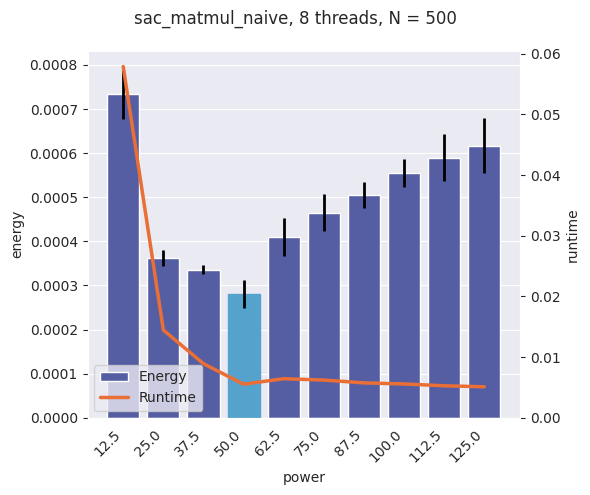

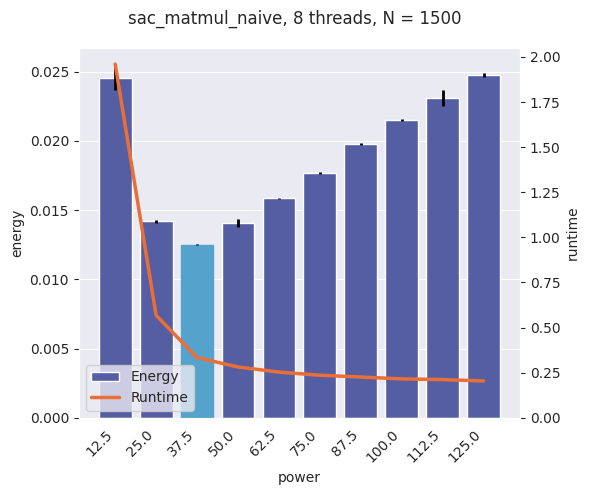

In [12]:
plot('results_sel265k/power_sac_matmul_naive.csv')

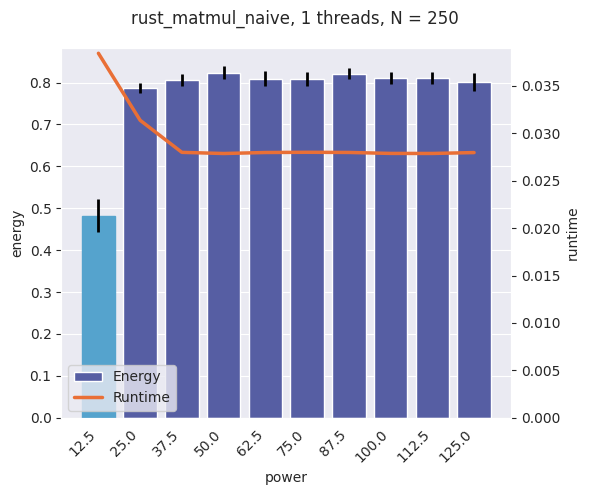

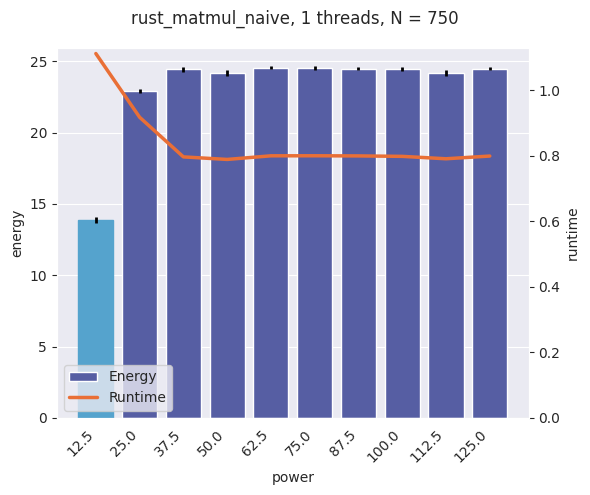

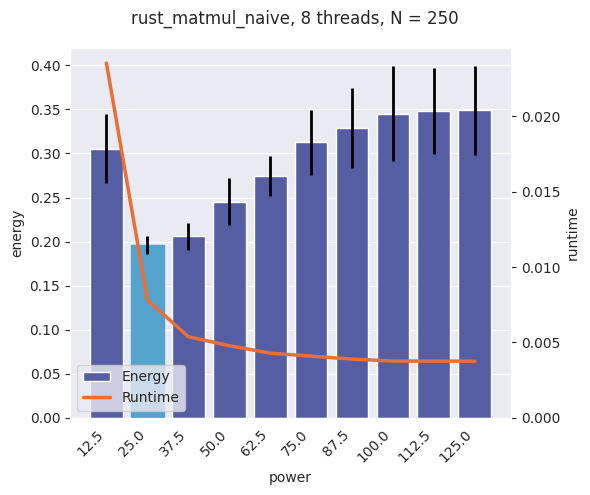

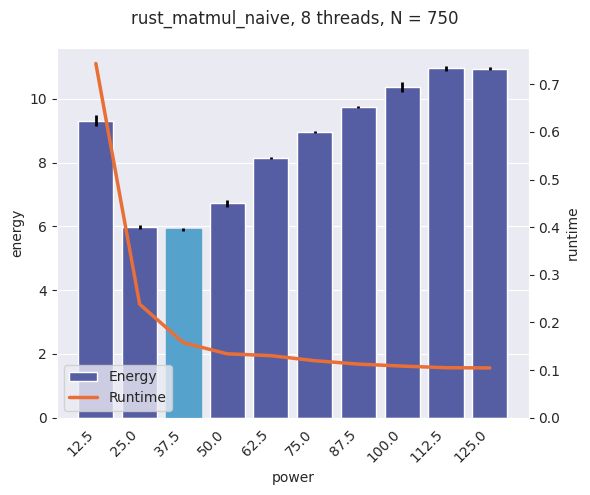

In [13]:
plot('results_sel265k/power_rust_matmul_naive.csv')

# FlashAttention (head dimension = 64, sequence length = N)

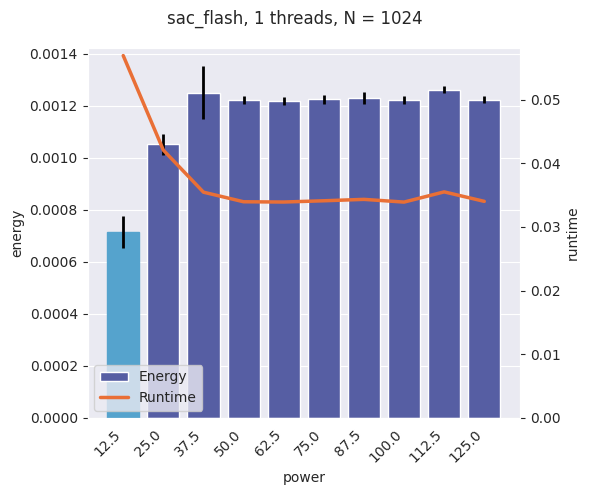

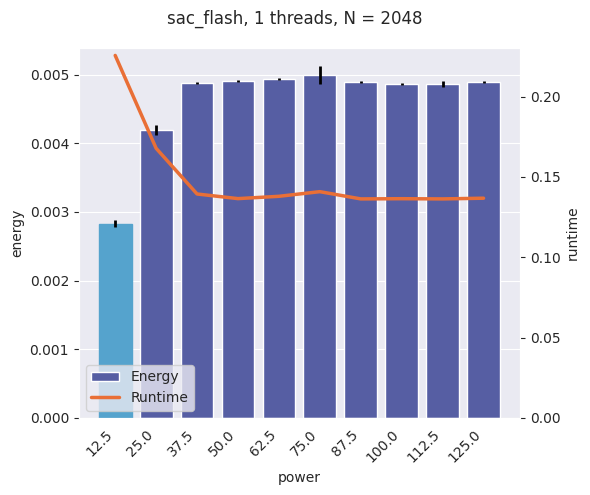

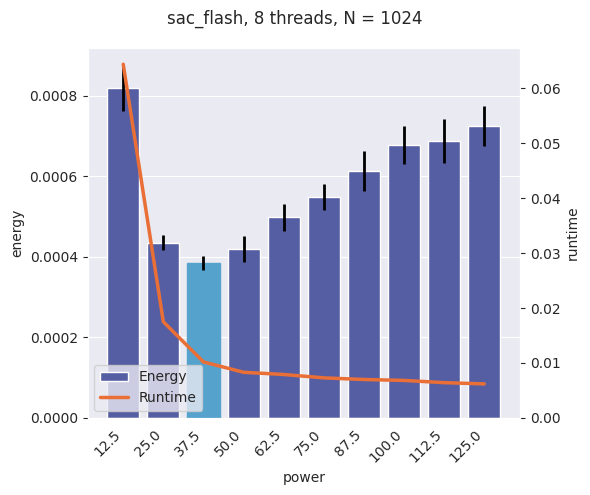

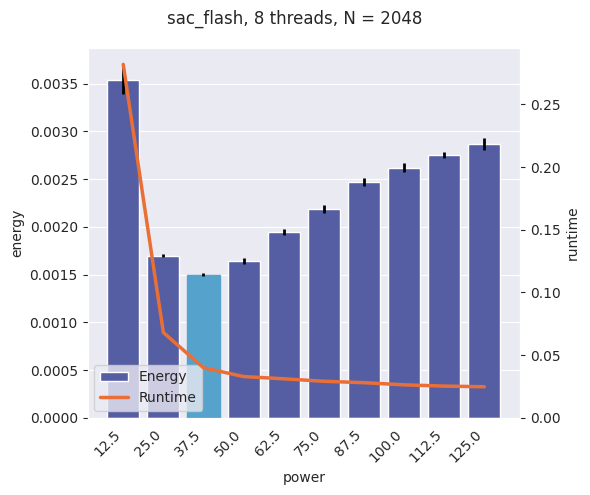

In [14]:
plot('results_sel265k/power_sac_flash.csv')